<a href="https://colab.research.google.com/github/FLC-ML/practicespace/blob/master/Time_Series_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN/LSTM Time Series Classification.

Proof of concept.

# Load Data

In [1]:
# Training Data
!wget https://www.dropbox.com/sh/gmgduvzyl5tken6/AAD6E17hrD8CfKwmRB9wfTKqa/X_reference.npy
!wget https://www.dropbox.com/sh/gmgduvzyl5tken6/AACaXFPq1qA5kLvhIF0Y0NfEa/y_reference.npy
# Testing Data
!wget https://www.dropbox.com/sh/gmgduvzyl5tken6/AABKsseO9QvObI4lTt-yXg8ta/X_test.npy
!wget https://www.dropbox.com/sh/gmgduvzyl5tken6/AACitgFQG5cfd7qs--swRbI0a/y_test.npy

--2020-07-15 18:29:50--  https://www.dropbox.com/sh/gmgduvzyl5tken6/AAD6E17hrD8CfKwmRB9wfTKqa/X_reference.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/gmgduvzyl5tken6/AAD6E17hrD8CfKwmRB9wfTKqa/X_reference.npy [following]
--2020-07-15 18:29:50--  https://www.dropbox.com/sh/raw/gmgduvzyl5tken6/AAD6E17hrD8CfKwmRB9wfTKqa/X_reference.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9c5f3af8d495b764ba8bda9a17.dl.dropboxusercontent.com/cd/0/inline/A7kvV6h1vlGqCc3h6lwE0sLSRWClTcnnYjRZt_GQ7u_mAsqbkmL-ZS8QPBnhV_LZ6orReAcaH0xg7424Or00KNzV0NUK5o-eNZdzKgas_CJXdYhHFqirBUNVsQJHit6IdXg/file# [following]
--2020-07-15 18:29:51--  https://uc9c5f3af8d495b764ba8bda9a17.dl.dropboxusercontent.com/cd/0/inline/A7kvV6h1vlGqCc3h6lwE0sLS

In [14]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Dense, Flatten, GlobalMaxPool1D, Dropout, Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.metrics import confusion_matrix
import itertools

import numpy as np
import matplotlib.pyplot as plt # Use pip install to get this outside of notebook
from matplotlib import cm
import pandas as pd

In [3]:
# If you want to check directory.
!ls

sample_data  X_reference.npy  X_test.npy  y_reference.npy  y_test.npy



new x_train shape: (60000, 1000, 1)
new x_test shape: (3000, 1000, 1)

X_data index shape: (1000, 1)
training set shape: (60000, 1000, 1) (60000,)
test set shape: (3000, 1000, 1) (3000,)
(array([   0,    1,    2, ..., 1997, 1998, 1999]),)
(array([2000, 2001, 2002, ..., 3997, 3998, 3999]),)


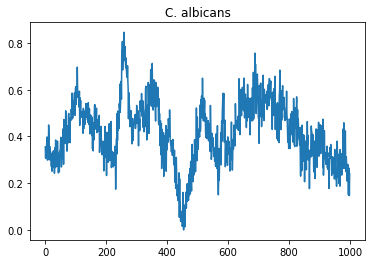

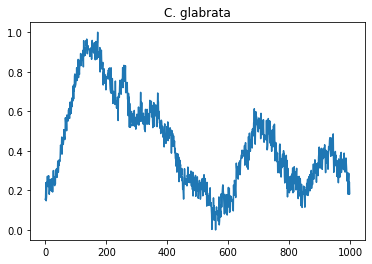

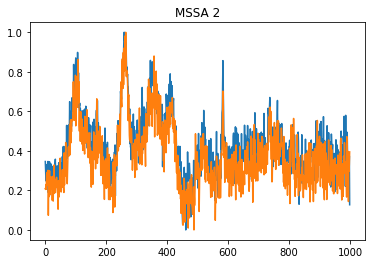

In [4]:
### Load the data:


# Training data load
X_train_loc = 'X_reference.npy'
y_train_loc = 'y_reference.npy'
X_train = np.load(X_train_loc)
y_train = np.load(y_train_loc)

# Testing data
X_test_loc = 'X_test.npy'
y_test_loc = 'y_test.npy'
X_test = np.load(X_test_loc)
y_test = np.load(y_test_loc)

# The data is only 2D
X_train = np.expand_dims(X_train, -1) 
X_test = np.expand_dims(X_test, -1)
print("\nnew x_train shape:", X_train.shape)
print("new x_test shape:", X_test.shape)
print("\nX_data index shape:", X_train[0].shape)

# Print shape of data loaded.
print("training set shape:", X_train.shape, y_train.shape)
print("test set shape:", X_test.shape, y_test.shape)

# Display where labels begin and end.
C_albicans = np.where(y_train==0)
C_glabrata = np.where(y_train==1)
print(C_albicans)
print(C_glabrata)

# Example Plots of signals
plt.figure()
plt.title("C. albicans")
plt.plot(X_train[0])
plt.figure()
plt.title("C. glabrata")
plt.plot(X_train[2000])
plt.figure()
plt.title("MSSA 2")
plt.plot(X_train[19000])
plt.plot(X_train[19005])

UPDATE: The labels are changing every 2000 spectra! 3000 spectra for each isolate.

In [36]:
### Build the Model
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X = X_train[indices]
y = y_train[indices]

indices_test = np.arange(X_test.shape[0])
np.random.shuffle(indices_test)
XX = X_test[indices_test]
yy = y_test[indices_test]


i = Input(shape=X[0].shape)
x = LSTM(20, return_sequences=True)(i)
x = Dropout(0.2)(x)
x = Conv1D(32, 3, activation='relu')(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(30, activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 1000, 1)]         0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 1000, 20)          1760      
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000, 20)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 998, 32)           1952      
_________________________________________________________________
dropout_6 (Dropout)          (None, 998, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 31936)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 30)                9581

In [37]:
### Compile and train
from time import time
start = time()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X, y, validation_data=(XX, yy), batch_size=1000, epochs=20)
print('Total time of computation:', time() - start)


Epoch 1/20
60/60 [==============================] - 6s 93ms/step - loss: 1.8566 - accuracy: 0.4951 - val_loss: 4.3254 - val_accuracy: 0.3377
Epoch 2/20
60/60 [==============================] - 5s 89ms/step - loss: 0.4123 - accuracy: 0.8704 - val_loss: 4.0674 - val_accuracy: 0.4550
Epoch 3/20
60/60 [==============================] - 5s 89ms/step - loss: 0.2648 - accuracy: 0.9139 - val_loss: 3.5223 - val_accuracy: 0.5157
Epoch 4/20
60/60 [==============================] - 5s 87ms/step - loss: 0.2158 - accuracy: 0.9293 - val_loss: 3.6401 - val_accuracy: 0.5540
Epoch 5/20
60/60 [==============================] - 5s 88ms/step - loss: 0.1946 - accuracy: 0.9343 - val_loss: 3.4702 - val_accuracy: 0.5650
Epoch 6/20
60/60 [==============================] - 5s 88ms/step - loss: 0.1771 - accuracy: 0.9410 - val_loss: 3.4864 - val_accuracy: 0.5467
Epoch 7/20
60/60 [==============================] - 5s 88ms/step - loss: 0.1711 - accuracy: 0.9426 - val_loss: 3.5257 - val_accuracy: 0.5727
Epoch 8/20
60

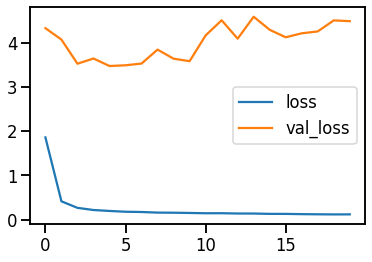

In [38]:
### Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

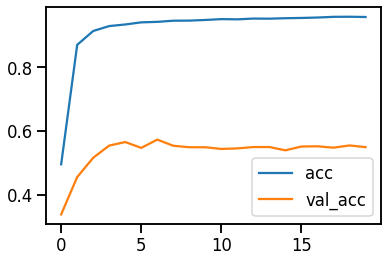

In [39]:
### Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [10]:
# 30 reference isolates
ORDER = [16, 17, 14, 18, 15, 20, 21, 24, 23, 26, 27, 28, 29, 25, 6, 7, 5, 3, 4,
         9, 10, 2, 8, 11, 22, 19, 12, 13, 0, 1]

STRAINS = {}
STRAINS[0] = "C. albicans"
STRAINS[1] = "C. glabrata"
STRAINS[2] = "K. aerogenes"
STRAINS[3] = "E. coli 1"
STRAINS[4] = "E. coli 2"
STRAINS[5] = "E. faecium"
STRAINS[6] = "E. faecalis 1"
STRAINS[7] = "E. faecalis 2"
STRAINS[8] = "E. cloacae"
STRAINS[9] = "K. pneumoniae 1"
STRAINS[10] = "K. pneumoniae 2"
STRAINS[11] = "P. mirabilis"
STRAINS[12] = "P. aeruginosa 1"
STRAINS[13] = "P. aeruginosa 2"
STRAINS[14] = "MSSA 1"
STRAINS[15] = "MSSA 3"
STRAINS[16] = "MRSA 1 (isogenic)"
STRAINS[17] = "MRSA 2"
STRAINS[18] = "MSSA 2"
STRAINS[19] = "S. enterica"
STRAINS[20] = "S. epidermidis"
STRAINS[21] = "S. lugdunensis"
STRAINS[22] = "S. marcescens"
STRAINS[23] = "S. pneumoniae 2"
STRAINS[24] = "S. pneumoniae 1"
STRAINS[25] = "S. sanguinis"
STRAINS[26] = "Group A Strep."
STRAINS[27] = "Group B Strep."
STRAINS[28] = "Group C Strep."
STRAINS[29] = "Group G Strep."

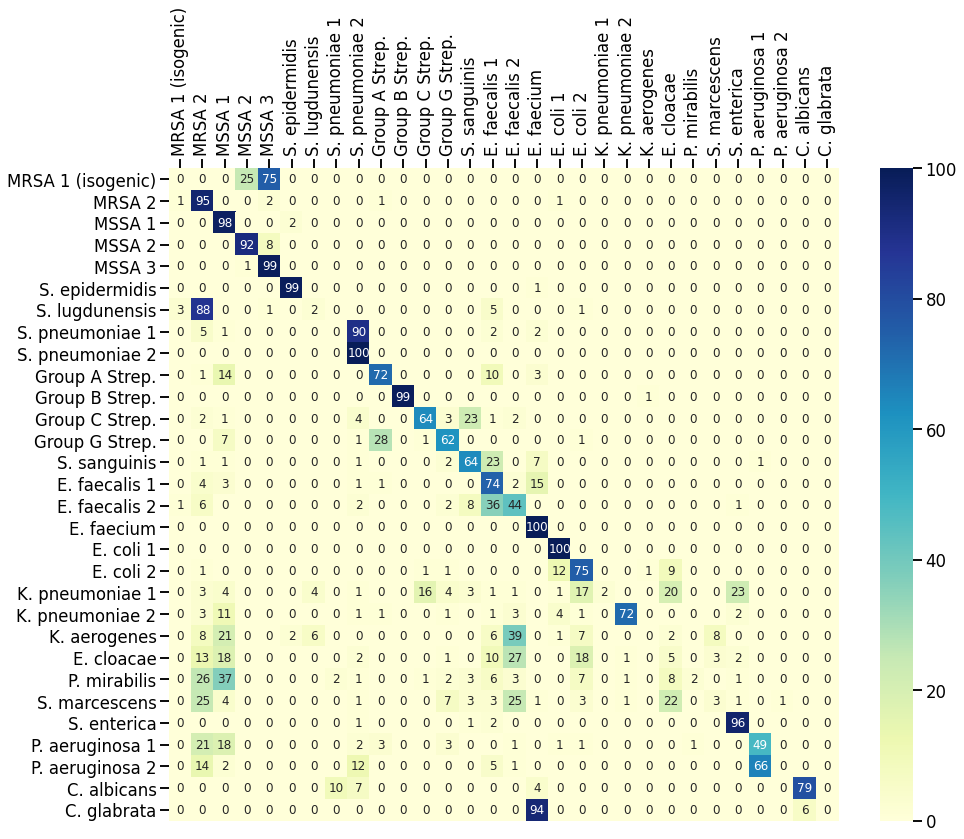

In [41]:
# Plot confusion matrix
p_test = model.predict(X_test).argmax(axis=1)

sns.set_context("talk", rc={"font":"Helvetica", "font.size":12})
label = [STRAINS[i] for i in ORDER]
cm = confusion_matrix(y_test, p_test, labels=ORDER)
plt.figure(figsize=(15, 12))
cm = 100 * cm / cm.sum(axis=1)[:,np.newaxis]
ax = sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='0.0f',
                 xticklabels=label, yticklabels=label)
ax.xaxis.tick_top()
plt.xticks(rotation=90) 
plt.show()

In [42]:
# Label mapping
labels = '''C_albicans
C_glabrata
K_aerogenes
E_coli_1
E_coli_2
E_faecium
E_faecalis_1
E_faecalis_2
E_cloacae
K_pneumoniae_1
K_pneumoniae_2
P_mirabilis
P_aeruginosa_1
P_aeruginosa_2
MSSA_1
MSSA_3
MRSA_1
MRSA_2
MSSA_2
S_enterica
S_epidermidis
S_lugdenensis
S_marcescens
S_pneumoniae_2
S_pneumoniae_1
S_sanguinis
Group_A_Strep.
Group_B_Strep
Group_C_Strep
Group_G_Strep'''.split()

Total misclassifications: 1353
Index of misclassified example: 133


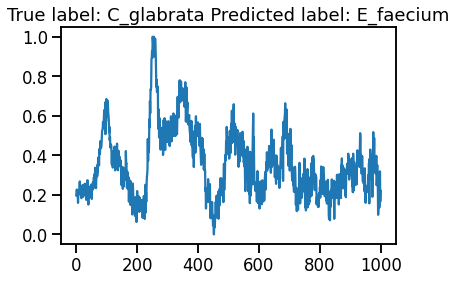

In [43]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
print('Total misclassifications:', len(misclassified_idx))
print('Index of misclassified example:',i)
#print(type(i))
# Changing float64 to int64
new_i = i.astype(int)
y_testnew = y_test.astype(int)
p_testnew = p_test.astype(int)
#print(type(new_i))
plt.plot(X_test[new_i])
plt.title("True label: %s Predicted label: %s" % (labels[y_testnew[new_i]], labels[p_testnew[new_i]]));